In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/kaggle/code/core')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import flg_unet
import flg_numerics
import importlib
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
train_data = fls.load_all_train_data()
model_loaded = fls.dill_load(fls.temp_dir + '/model.pickle')
training_data_loaded = copy.deepcopy(train_data)
for t in training_data_loaded: t.load_to_h5py()

MainProcess


FileNotFoundError: [Errno 2] No such file or directory: 'd:/flagellar/temp//model.pickle'

In [ ]:
cpu,device = fls.prep_pytorch(42, True, False)
nn_model = model_loaded.model.to(device)
nn_model.eval()
ind = [100,100,350]
ran = [96,96,96]
import torch
import torch.nn as nn
import torch.nn.functional as F
res_list = []
offset_list = np.arange(-120,121,10)
x=np.zeros((500,500,500))
x[ind[0],ind[1],ind[2]]=1
data = x[np.newaxis, np.newaxis, ind[0]-ran[0]:ind[0]+ran[0], ind[1]-ran[1]:ind[1]+ran[1], ind[2]-ran[2]:ind[2]+ran[2]]
#print(data.shape)
d = torch.tensor(data.astype(np.float32)).to(device)
R=nn_model(d).detach().cpu().numpy()
R0 = nn_model(0*d).detach().cpu().numpy()
R_plot = R-R0
plt.figure(figsize=(15,15))
plt.imshow(np.log(np.abs(np.sum(R_plot[0,0,:,:,:],axis=0))), cmap='gray')
plt.colorbar()

In [ ]:
import torch
np.max(R)

In [ ]:
isinstance(model.nn_model,pytorch3dunet.unet3d.model.UNet3D)

In [2]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
def score(recall):
    ratio_is_motor = 100/(900*0.3)
    precision = recall*ratio_is_motor
    return 5*precision*recall/(4*precision+recall)
    print(precision)
r_vals = np.linspace(0,1,10)
r_vals[0] = 1e-10
s_vals = [score(r) for r in r_vals]
import matplotlib.pyplot as plt

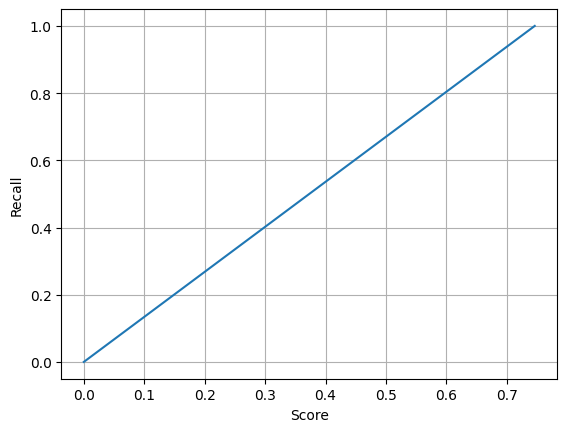

In [5]:
plt.figure()
plt.plot(s_vals, r_vals)
plt.xlabel('Score')
plt.ylabel('Recall')
plt.grid(True)